## Hypothesis 2
Spam has more money related terms (e.g. price, free, money).

In [82]:
import pandas as pd

In [83]:
full_df = pd.read_csv("../data/processed/full_df.csv")

In [84]:
full_df.head(2)

,body,cleaned_body,label,pos_tags,percentage_vb_dt_nn,percentage_vb_jj_nn,percentage_nn_md_vb,tokens
0,Subject: naturally irresistible your corporate...,naturally irresistible your corporate identity...,1,"['RB', 'JJ', 'PRP$', 'JJ', 'NN', 'NN', 'VBZ', ...",3.743316,2.139037,1.069519,"['naturally', 'irresistible', 'corporate', 'id..."
1,Subject: the stock trading gunslinger fanny i...,the stock trading gunslinger fanny is merrill ...,1,"['DT', 'NN', 'NN', 'NN', 'NN', 'VBZ', 'RB', 'C...",0.000000,0.000000,0.000000,"['stock', 'trading', 'gunslinger', 'fanny', 'm..."


In [85]:
import seaborn as sns

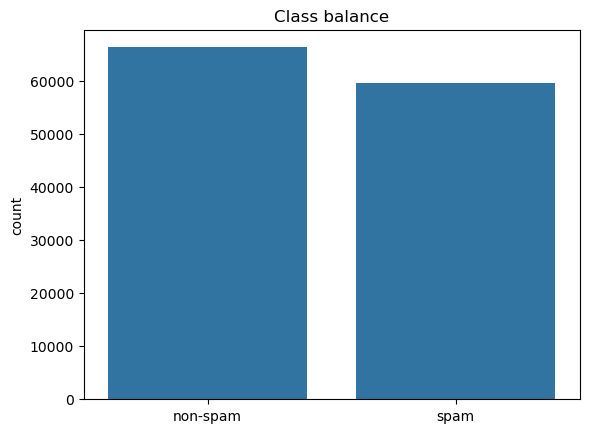

In [86]:
count = full_df['label'].value_counts()
labels = {0:'non-spam', 1:'spam'}

ax = sns.barplot(x = labels, y = count).set_title("Class balance")

Bag of Words (BoW) analysis

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [88]:
spam = full_df[full_df['label'] == 1].copy()
ham = full_df[full_df['label'] == 0].copy()

In [ ]:
bow_vectorizer = CountVectorizer(stop_words='english', max_features= 1000, min_df=4, ngram_range =(1,3))
X_bow_spam = bow_vectorizer.fit_transform(spam['tokens'])   
bow_features_spam = bow_vectorizer.get_feature_names_out()

bow_vectorizer = CountVectorizer(stop_words='english', max_features= 1000, min_df=4, ngram_range =(1,3))
X_bow_ham = bow_vectorizer.fit_transform(ham['tokens'])
bow_features_ham = bow_vectorizer.get_feature_names_out()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

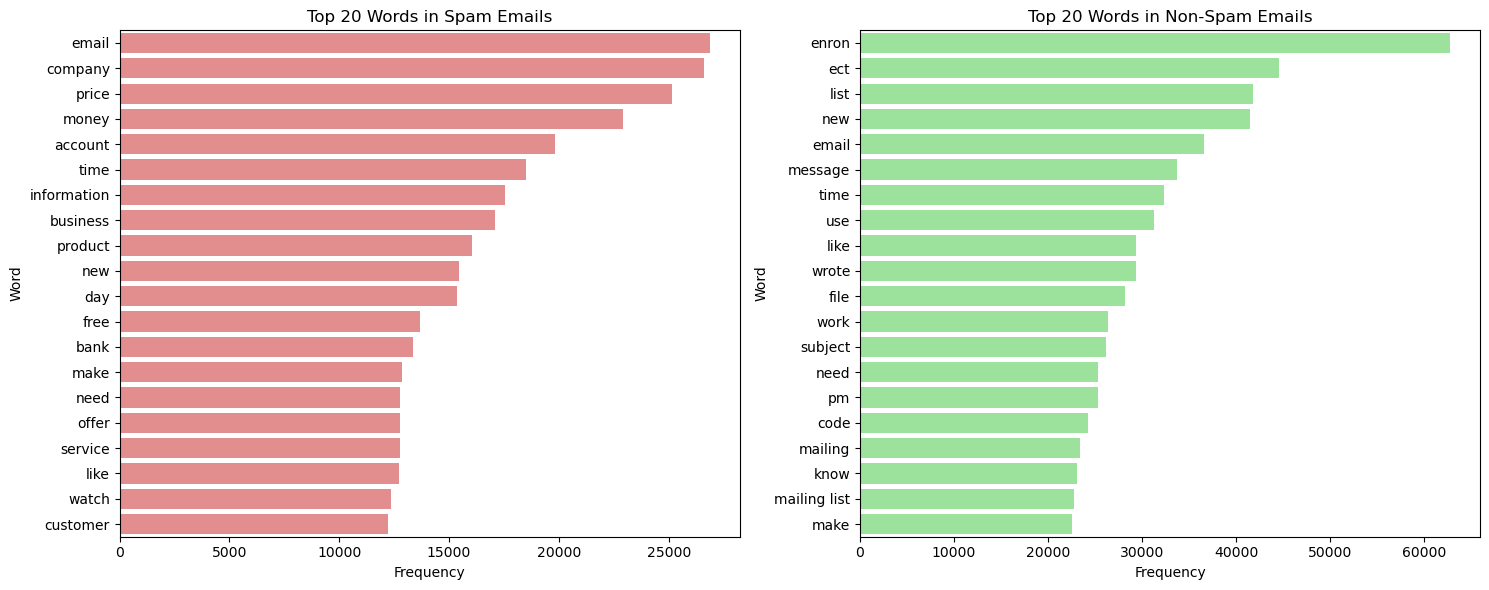

In [ ]:
word_freq_spam = np.asarray(X_bow_spam.sum(axis=0)).flatten()
word_freq_ham = np.asarray(X_bow_ham.sum(axis=0)).flatten()

word_freq_spam_df = pd.DataFrame({'word': bow_features_spam, 'frequency': word_freq_spam})
word_freq_ham_df = pd.DataFrame({'word': bow_features_ham, 'frequency': word_freq_ham})

top_spam = word_freq_spam_df.sort_values(by='frequency', ascending=False).head(20)
top_ham = word_freq_ham_df.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='frequency', y='word', data=top_spam, color="lightcoral")
plt.title("Top 20 Words in Spam Emails")
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.subplot(1, 2, 2)
sns.barplot(x='frequency', y='word', data=top_ham, color="lightgreen")
plt.title("Top 20 Words in Non-Spam Emails")
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.tight_layout()
plt.show()

N-grams analysis

In [ ]:
word_vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=1000, stop_words='english', min_df = 5, max_df = 0.8, sublinear_tf=True)

X_text_full = full_df['cleaned_body']
X_word_grams_tfidf = word_vectorizer_tfidf.fit_transform(X_text_full)

In [ ]:
# split for spam and ham
X_tfidf_spam = word_vectorizer_tfidf.transform(spam['cleaned_body'])
X_tfidf_ham = word_vectorizer_tfidf.transform(ham['cleaned_body'])

In [ ]:
feature_names = word_vectorizer_tfidf.get_feature_names_out()
print(f"\nNumber of features (columns): {len(feature_names)}")
print(f"First 10 features: {feature_names[:10]}")


Number of features (columns): 1000
First 10 features: ['able' 'access' 'according' 'account' 'act' 'action' 'actually' 'add'
 'added' 'added submissionid']


In [ ]:
spam_scores_sum = np.array(X_tfidf_spam.sum(axis=0)).flatten()
ham_scores_sum = np.array(X_tfidf_ham.sum(axis=0)).flatten()

combined_df_tfidf = pd.DataFrame({
    'word': feature_names,
    'spam tfifd score': spam_scores_sum,
    'ham tfifd score': ham_scores_sum
})

In [ ]:
top_spam_words = combined_df_tfidf.sort_values(by='spam tfifd score', ascending=False)
print("--- Top 20 Words in Spam ---")
print(top_spam_words.head(20)) 

--- Top 20 Words in Spam ---
        word  spam tfifd score  ham tfifd score
638    price       1590.589018       350.009573
699  replica       1536.619509         6.021063
952  watches       1433.383099        10.316343
114    click       1422.360733       520.717221
525    money       1356.185549       154.311992
236    email       1336.091122      1988.106086
59      best       1335.889089       662.819343
571   online       1329.492919       315.399538
884     time       1271.597484      1345.255016
179      day       1264.372959       723.060833
436     life       1233.450372       175.673458
298     free       1203.564433       677.422181
183     dear       1174.613494       379.538966
667  quality       1173.787957       130.228719
543      new       1165.138534      1672.481485
405     just       1161.522171      1449.554639
564    offer       1112.646745       253.832186
437     like       1104.661878      1680.260569
951    watch       1089.094618       246.256090
119      co

In [ ]:
top_ham_words = combined_df_tfidf.sort_values(by='ham tfifd score', ascending=False)
print("--- Top 20 Words in Ham ---")
print(top_ham_words.head(20))

--- Top 20 Words in Ham ---
             word  spam tfifd score  ham tfifd score
990         wrote         56.800602      2462.937391
446          list        408.599227      2420.452283
236         email       1336.091122      1988.106086
470       mailing        199.974818      1870.787107
874        thanks        392.263905      1864.561523
471  mailing list        139.726093      1858.523358
243         enron          0.312704      1807.148754
919           use        744.370824      1722.632527
437          like       1104.661878      1680.260569
543           new       1165.138534      1672.481485
618            pm         72.847827      1610.079204
118          code        118.444526      1592.063825
503       message        641.292541      1583.611255
413          know        807.628779      1505.590488
914   unsubscribe        301.541672      1502.703718
833       subject        257.095529      1493.095861
405          just       1161.522171      1449.554639
280          file 

In [ ]:
# calculate tfidf score difference to compare
combined_df_tfidf['tfidf_difference'] = combined_df_tfidf['spam tfifd score'] - combined_df_tfidf['ham tfifd score']

In [ ]:
comparing_spam = combined_df_tfidf.sort_values(by='tfidf_difference', ascending=False)
print("--- Top 20 largest difference: Spam_tfidf- Ham_tfidf ---")
print(comparing_spam.head(20))

# from this list we see words that appear in spam much more than ham

--- Top 20 largest difference: Spam_tfidf- Ham_tfidf ---
            word  spam tfifd score  ham tfifd score  tfidf_difference
699      replica       1536.619509         6.021063       1530.598445
952      watches       1433.383099        10.316343       1423.066757
638        price       1590.589018       350.009573       1240.579445
525        money       1356.185549       154.311992       1201.873557
436         life       1233.450372       175.673458       1057.776914
667      quality       1173.787957       130.228719       1043.559238
571       online       1329.492919       315.399538       1014.093381
114        click       1422.360733       520.717221        901.643512
564        offer       1112.646745       253.832186        858.814559
335       health       1058.100451       204.903691        853.196760
951        watch       1089.094618       246.256090        842.838528
742         save       1002.201768       205.640584        796.561184
183         dear       1174.61349

In [ ]:
comparing_ham = combined_df_tfidf.sort_values(by='tfidf_difference', ascending=True) # flip order
print("--- Top 20 largest difference: Ham_tfidf- Spam_tfidf ---")
print(comparing_ham.head(20))

# from this list we see words that appear in ham much more than in spam

--- Top 20 largest difference: Ham_tfidf- Spam_tfidf ---
             word  spam tfifd score  ham tfifd score  tfidf_difference
990         wrote         56.800602      2462.937391      -2406.136789
446          list        408.599227      2420.452283      -2011.853056
243         enron          0.312704      1807.148754      -1806.836050
471  mailing list        139.726093      1858.523358      -1718.797265
470       mailing        199.974818      1870.787107      -1670.812289
618            pm         72.847827      1610.079204      -1537.231377
118          code        118.444526      1592.063825      -1473.619299
874        thanks        392.263905      1864.561523      -1472.297618
833       subject        257.095529      1493.095861      -1236.000332
914   unsubscribe        301.541672      1502.703718      -1201.162046
280          file        206.747748      1352.230674      -1145.482926
937         vince          3.399655      1118.868649      -1115.468994
228           ect   

Visualising differences

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

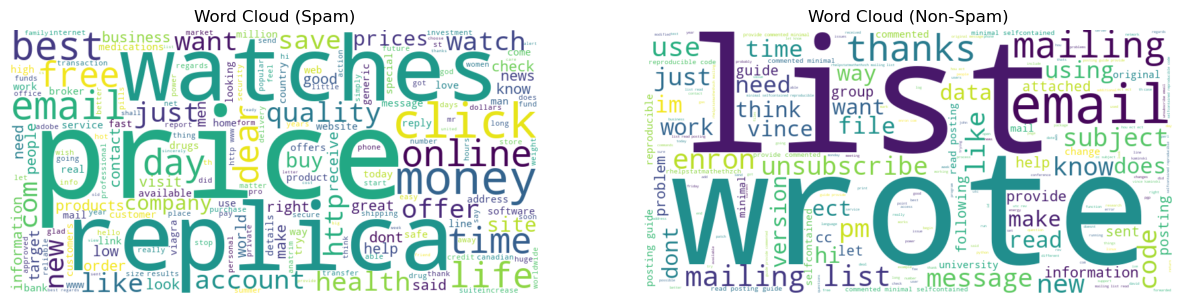

In [ ]:
spam_dict = dict(zip(combined_df_tfidf['word'], combined_df_tfidf['spam tfifd score']))
ham_dict = dict(zip(combined_df_tfidf['word'], combined_df_tfidf['ham tfifd score']))

wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_dict)
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_dict)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (Spam)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (Non-Spam)")
plt.show()

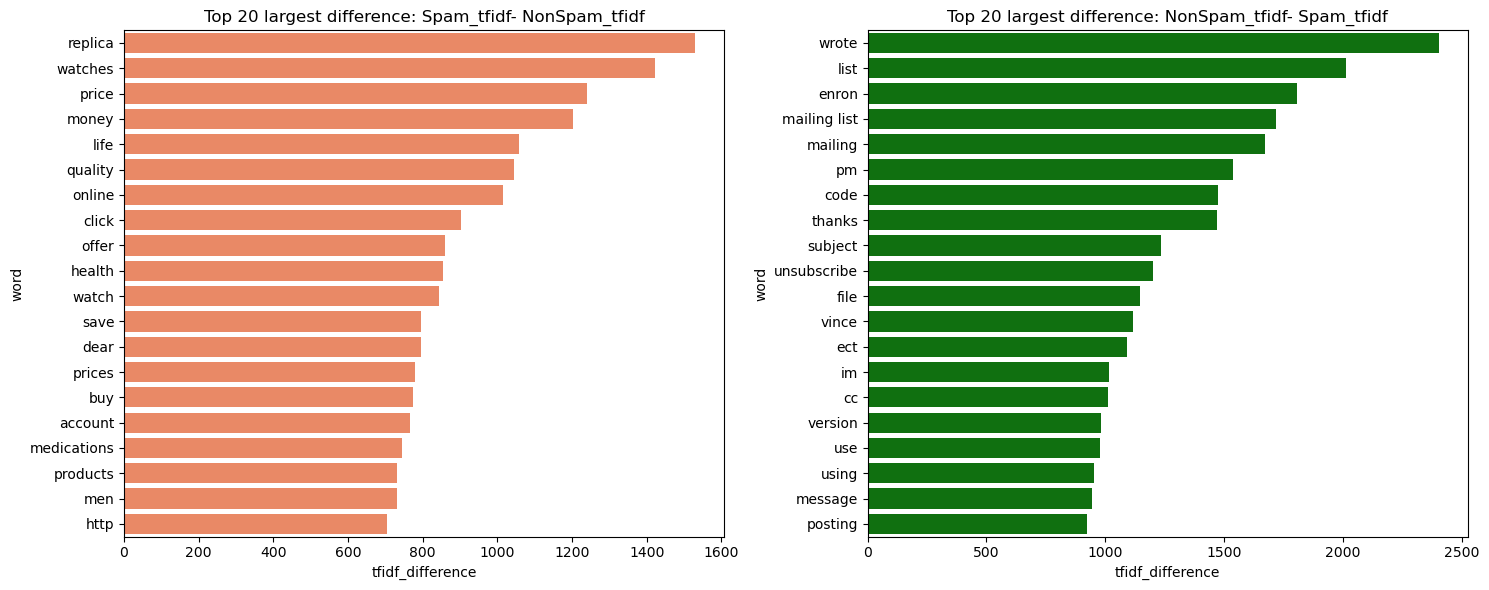

In [ ]:
top_spam = combined_df_tfidf.sort_values('tfidf_difference', ascending=False).head(20)

top_ham = combined_df_tfidf.sort_values('tfidf_difference', ascending=True).head(20).copy()
top_ham['tfidf_difference'] = top_ham['tfidf_difference'].abs() # to get positive values for ham

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='tfidf_difference', y='word', data=top_spam, color='coral')
plt.title("Top 20 largest difference: Spam_tfidf- NonSpam_tfidf")

plt.subplot(1, 2, 2)
sns.barplot(x='tfidf_difference', y='word', data=top_ham, color='green')
plt.title("Top 20 largest difference: NonSpam_tfidf- Spam_tfidf")
plt.tight_layout()
plt.show()

Will need to do further data cleaning to remove words - e.g. enron, subject, cc - for more accurate analysis.

Possible hypotheses derived:
- Spam content have more financial terms -- price, money, offer
- Spam content have external links -- click